# Apprendre python 

## Bases 

In [3]:
# Dependances
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# !pip install

### Variable et fonction

In [6]:
x = 5 
y = 2
z = 3 
print(x, y, z)

5 2 3


In [7]:
def somme (x, y, z):
    Somme = x + y + z
    return Somme

In [8]:
somme(5,2,3)

10

In [9]:
somme(x,y,z)

10

In [10]:
## Créer une fonction permettant de calculer une normalisation et l'utiliser 

<details><summary>Solution</summary>

```python
    def normal(x, X, s):
    x_norm = (x-X)/s
    return x_norm
```
</details>

### Listes

In [13]:
List = [1,2,3,4,5,6] 

In [14]:
print(List[1])
print(List[-1])
print(List[0:3])

2
6
[1, 2, 3]


In [15]:
List_2 = [0.1, 0.5, 0.3, 0.9]

In [16]:
List_2.append(0.4)
List_2.insert(2,'Bonjour')

In [17]:
print('Ceci est la Liste 2 :', List_2)
print('Voici sa longueur :', len(List_2))

Ceci est la Liste 2 : [0.1, 0.5, 'Bonjour', 0.3, 0.9, 0.4]
Voici sa longueur : 6


In [18]:
del List_2[2]
List_2.sort()
List_2

[0.1, 0.3, 0.4, 0.5, 0.9]

### Dictionnaire

In [20]:
dictionnaire = {'0' : 'Lola',
                '1' : 'Dorine',}
print(dictionnaire)

{'0': 'Lola', '1': 'Dorine'}


In [21]:
classeur = {'name': [], 'age': []}

# Les données à ajouter
name = ['Ben', 'Sara']
age = [26, 23]

# Ajouter les éléments un par un
classeur['name'].append(name)  # Ajoute chaque élément de la liste `name`
classeur['age'].append(age)    # Ajoute chaque élément de la liste `age`

print(classeur)

{'name': [['Ben', 'Sara']], 'age': [[26, 23]]}


In [22]:
for i in classeur:
    print('Voici les clés du dico :', i)

Voici les clés du dico : name
Voici les clés du dico : age


### If ?

In [24]:
def signe(x): 
    if x > 0 : 
        print (x, 'positive')

In [25]:
print(signe(2), signe(-2))

2 positive
None None


In [26]:
def signe(x): 
    if x > 0 : 
        print (x, 'positive')
    else : 
        print(x, 'negative')

In [27]:
print(signe(2), signe(-2), signe(0))

2 positive
-2 negative
0 negative
None None None


In [28]:
def signe(x): 
    if x > 0 : 
        print (x, 'positive')
    elif x == 0 :
        print(x, 'null')
    else : 
        print(x, 'negative')

In [29]:
print(signe(2), signe(-2), signe(0))

2 positive
-2 negative
0 null
None None None


In [30]:
### Exercice 
# Step 1 : Créer une liste d'entier positif et négatif
# Step 2 : Initialiser un classeur vide avec une clé 'positive' et 'négative'
# Step 3 : Créer une fonction trier(dico,nombre) (conseil utiliser append)
# Step 4 : Faire passer la liste dans le trieur

<details><summary>Solution</summary>

```python
## Création d'une liste d'entier négatif et positif
integer = [-2, 3, 5, -6]

## Créer un classeur vide
classeur = { "positif": [],
            "négatif": []}

## Fonction trier
def trier(classeur, nombre):
    if nombre >= 0:
        classeur["positif"].append(nombre)
    else:
        classeur["négatif"].append(nombre)
    return classeur

## Faire passer la liste dans le trieur
for i in integer:
    trier(classeur, i)

classeur
```
</details>

### Built-in Fonctions

In [33]:
x = -5.5
Liste = [1,2,3,4,5,6] 

In [34]:
print(abs(x))
print(max(Liste))
print(min(Liste))

print(type(x))
print(str(x))
print(int(x))
print(float(x))

5.5
6
1
<class 'float'>
-5.5
-5
-5.5


### Pandas

In [40]:
data = pd.read_excel('titanic.xls')

In [41]:
data = pd.read_csv('C:/Users/Lucas/dataset_gym.csv', sep = ',')

In [42]:
data.shape

(973, 15)

In [43]:
data.head()
data.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


In [44]:
data.info
data.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [45]:
print(data.dtypes.value_counts())

float64    7
int64      6
object     2
Name: count, dtype: int64


In [46]:
data.describe(include = 'all')

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.000000,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,NaN,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,NaN,NaN,NaN
mean,38.683453,NaN,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,NaN,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,NaN,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,NaN,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,NaN,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,NaN,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,4.000000,2.000000,28.560000


In [47]:
data.isna().sum()/data.shape[0]

Age                              0.0
Gender                           0.0
Weight (kg)                      0.0
Height (m)                       0.0
Max_BPM                          0.0
Avg_BPM                          0.0
Resting_BPM                      0.0
Session_Duration (hours)         0.0
Calories_Burned                  0.0
Workout_Type                     0.0
Fat_Percentage                   0.0
Water_Intake (liters)            0.0
Workout_Frequency (days/week)    0.0
Experience_Level                 0.0
BMI                              0.0
dtype: float64

In [48]:
data.dropna(axis = 0, inplace = True)

In [49]:
data['Gender'].replace(['Male','Female'], [0,1], inplace = True)
print(data['Gender'].head())

0    0
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64


C:\Users\Lucas\AppData\Local\Temp\ipykernel_12952\1227858836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(['Male','Female'], [0,1], inplace = True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_12952\1227858836.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gen

<Axes: >

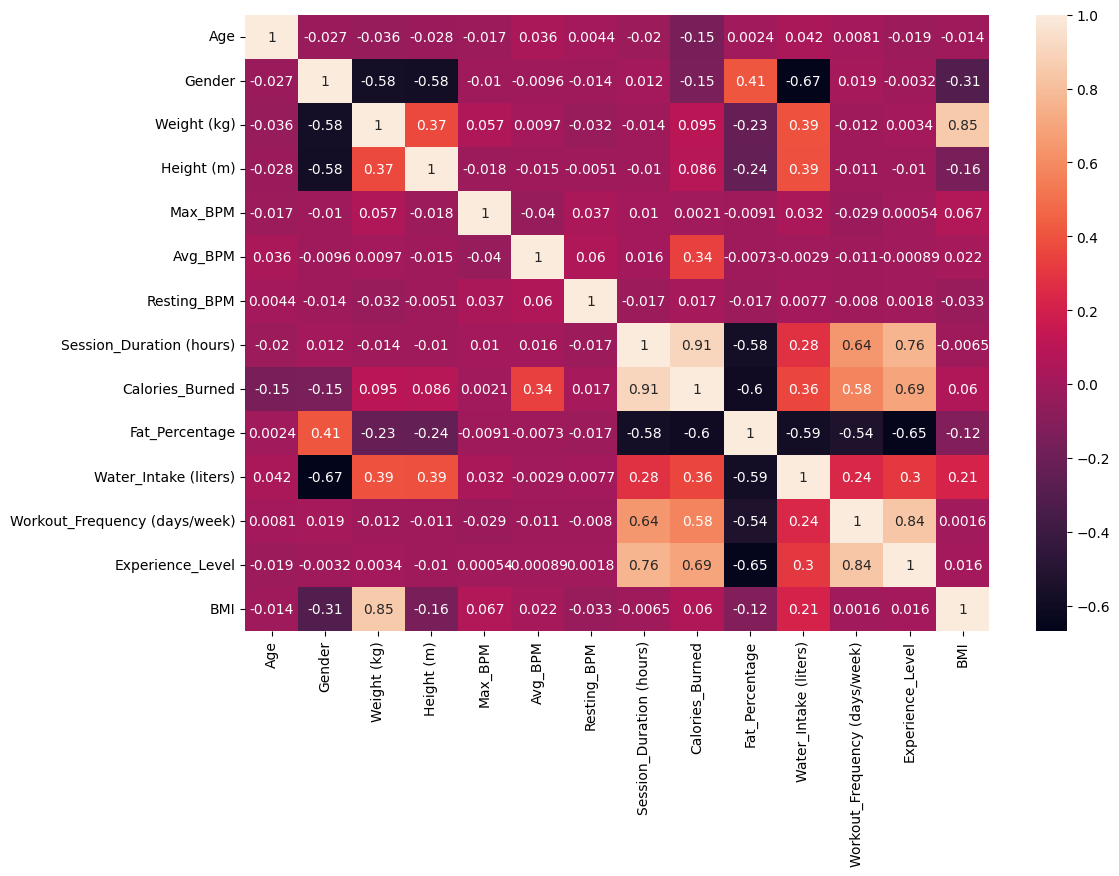

In [50]:
numerical_columns = data.select_dtypes(include=('int64','float64')).columns

plt.figure(figsize=(12,8))
sns.heatmap(data[numerical_columns].corr(),annot =True)

In [51]:
## Outliers

In [52]:
def outliers(data):
    outliers_dict = {}
    
    for column in data.select_dtypes(include=[np.number]).columns: 
        q25, q75 = np.percentile(data[column], [25, 75])
        iqr = q75 - q25
        lower_bound = q25 - 1.5 * iqr
        upper_bound = q75 + 1.5 * iqr

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_dict[column] = outliers[column]
    
    return outliers_dict

In [53]:
outliers_data = outliers(data)
print('Voici les outliers: ', outliers_data)  

Voici les outliers:  {'Age': Series([], Name: Age, dtype: int64), 'Gender': Series([], Name: Gender, dtype: int64), 'Weight (kg)': 96     129.0
122    129.5
180    128.2
283    128.4
291    128.4
593    129.9
614    128.4
648    127.9
854    129.2
Name: Weight (kg), dtype: float64, 'Height (m)': Series([], Name: Height (m), dtype: float64), 'Max_BPM': Series([], Name: Max_BPM, dtype: int64), 'Avg_BPM': Series([], Name: Avg_BPM, dtype: int64), 'Resting_BPM': Series([], Name: Resting_BPM, dtype: int64), 'Session_Duration (hours)': Series([], Name: Session_Duration (hours), dtype: float64), 'Calories_Burned': 90     1688.0
99     1625.0
124    1701.0
475    1622.0
511    1725.0
572    1646.0
646    1675.0
712    1766.0
728    1634.0
910    1783.0
Name: Calories_Burned, dtype: float64, 'Fat_Percentage': Series([], Name: Fat_Percentage, dtype: float64), 'Water_Intake (liters)': Series([], Name: Water_Intake (liters), dtype: float64), 'Workout_Frequency (days/week)': Series([], Name: Workout

In [54]:
for col, outlier_values in outliers_data.items():
    print(f"Outliers dans la colonne {col} :\n{outlier_values}\n")

Outliers dans la colonne Age :
Series([], Name: Age, dtype: int64)

Outliers dans la colonne Gender :
Series([], Name: Gender, dtype: int64)

Outliers dans la colonne Weight (kg) :
96     129.0
122    129.5
180    128.2
283    128.4
291    128.4
593    129.9
614    128.4
648    127.9
854    129.2
Name: Weight (kg), dtype: float64

Outliers dans la colonne Height (m) :
Series([], Name: Height (m), dtype: float64)

Outliers dans la colonne Max_BPM :
Series([], Name: Max_BPM, dtype: int64)

Outliers dans la colonne Avg_BPM :
Series([], Name: Avg_BPM, dtype: int64)

Outliers dans la colonne Resting_BPM :
Series([], Name: Resting_BPM, dtype: int64)

Outliers dans la colonne Session_Duration (hours) :
Series([], Name: Session_Duration (hours), dtype: float64)

Outliers dans la colonne Calories_Burned :
90     1688.0
99     1625.0
124    1701.0
475    1622.0
511    1725.0
572    1646.0
646    1675.0
712    1766.0
728    1634.0
910    1783.0
Name: Calories_Burned, dtype: float64

Outliers dans

### Plot

In [56]:
x = np.linspace (0,2,10)
y = x**2
print(x)

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


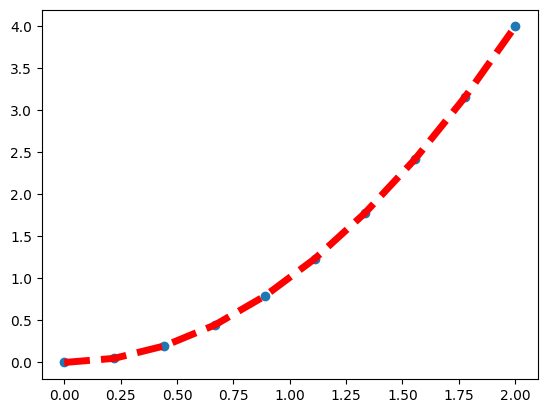

In [57]:
plt.plot(x,y, c = 'red', lw=5, ls= '--')
plt.scatter(x,y)
plt.show()

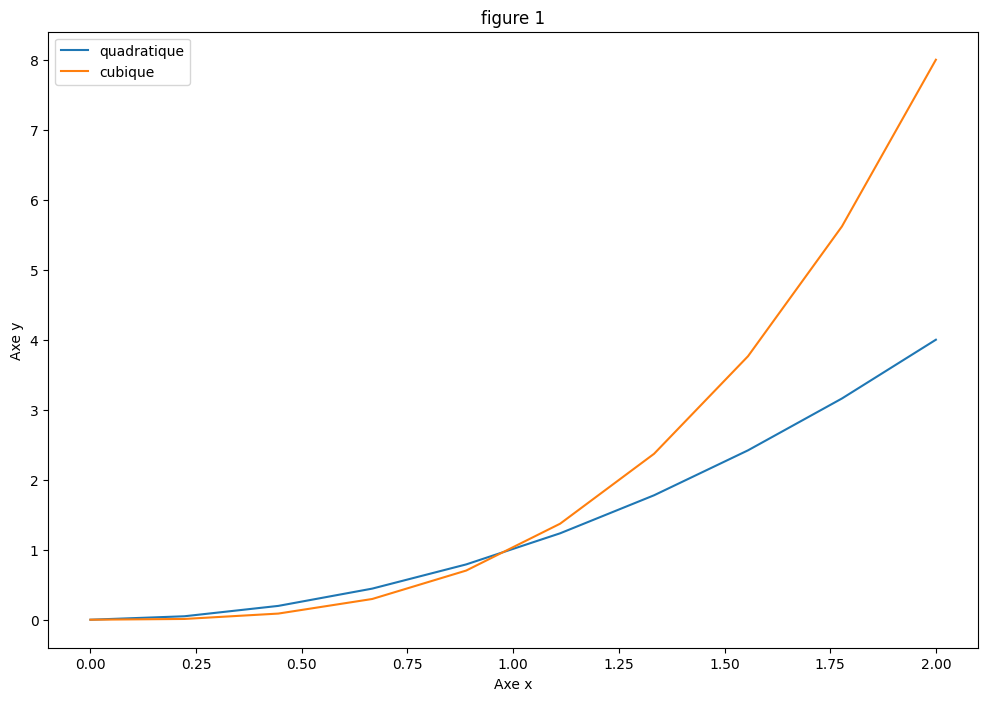

In [58]:
plt.figure(figsize = (12,8))
plt.plot(x,y, label = 'quadratique')
plt.plot(x,x**3, label = 'cubique')
plt.title('figure 1')
plt.xlabel('Axe x')
plt.ylabel('Axe y')
plt.legend()
plt.show()
# plt.savefig('figure.png')

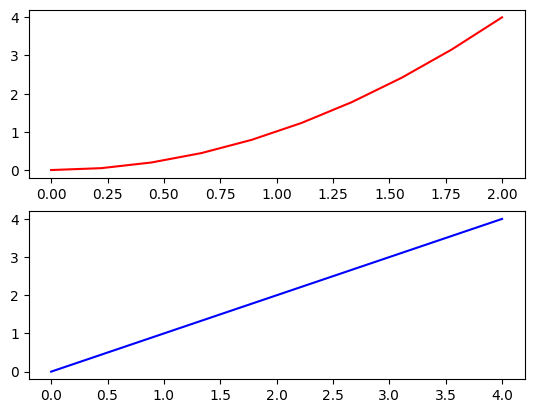

In [59]:
plt.subplot(2,1,1)
plt.plot(x,y, c= 'red')
plt.subplot(2,1,2)
plt.plot(x**2,y, c= 'blue')
plt.show()

### Sigmoide

In [61]:
from scipy.optimize import curve_fit

In [62]:
data = pd.read_csv('data.csv', sep = ";")
data.head()

,Distance,Estimation,Participant
0,2.0,0,1
1,8.0,1,1
2,7.0,1,1
3,1.0,0,1
4,3.0,0,1


In [63]:
grouped = data.groupby("Distance")["Estimation"].mean().reset_index()
x_data = grouped["Distance"]
y_data = grouped["Estimation"]
grouped

,Distance,Estimation
0,1.0,0.017501
1,2.0,0.020224
2,3.0,0.054431
3,4.0,0.222618
4,5.0,0.796657
5,6.0,0.959474
6,7.0,0.980843
7,8.0,0.985210


In [64]:
def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

In [65]:
# Ajustement de la courbe sigmoïde
popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=[1, 4])  # Initialisation de a et b

# Paramètres ajustés
a_fit, b_fit = popt
print(f"Paramètres ajustés : a = {a_fit:.2f}, b = {b_fit:.2f}")

Paramètres ajustés : a = 2.49, b = 4.48


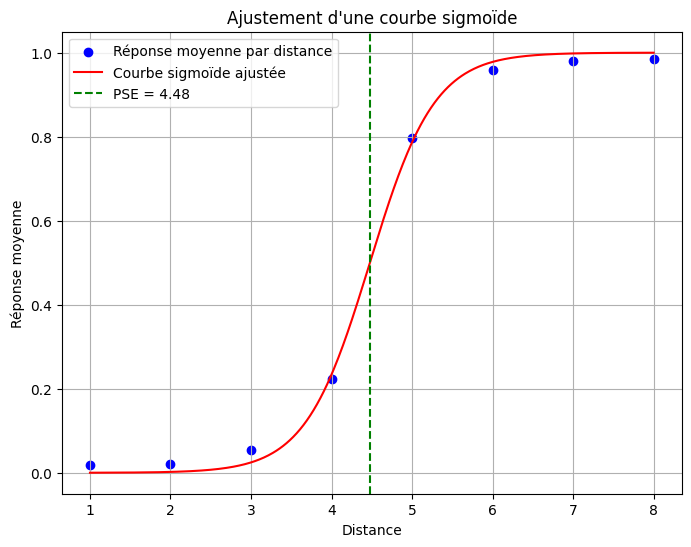

In [66]:
# Tracer la courbe ajustée
x_fit = np.linspace(1, 8, 500)  # Points pour tracer la courbe lissée
y_fit = sigmoid(x_fit, *popt)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, color="blue", label="Réponse moyenne par distance")
plt.plot(x_fit, y_fit, color="red", label="Courbe sigmoïde ajustée")
plt.axvline(b_fit, color="green", linestyle="--", label=f"PSE = {b_fit:.2f}")
plt.xlabel("Distance")
plt.ylabel("Réponse moyenne")
plt.title("Ajustement d'une courbe sigmoïde")
plt.legend()
plt.grid(True)
plt.show()

### Numpy 

In [36]:
A = np.array([[1,2,3], [4,5,6],[7,8,9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [37]:
print(A.ndim)
print(A.shape)
print(A.size)

2
(3, 3)
9


In [38]:
print(A[:,0])
print(A[0,:])
print(A[0:2, 0:2])

[1 4 7]
[1 2 3]
[[1 2]
 [4 5]]


### Analyse du mouvement

In [68]:
shoulder = np.array([[0, 0, 0], [1, 0, 0], [2, 1, 0], [3, 1, 1], [4, 1, 1]])
wrist = np.array([[1, 1, 0], [2, 2, 0], [3, 3, 1], [4, 3, 1], [5, 4, 2]])

In [69]:
def calculate_velocity(positions, time_interval=1.0):
    velocities = np.diff(positions, axis=0) / time_interval  # Différences successives
    speeds = np.linalg.norm(velocities, axis=1)  # Norme de la vitesse
    return velocities, speeds

In [70]:
velocities_shoulder, speeds_shoulder = calculate_velocity(shoulder)
velocities_wrist, speeds_wrist = calculate_velocity(wrist)

In [71]:
print(velocities_shoulder)
print(speeds_shoulder)

[[1. 0. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 0.]]
[1.         1.41421356 1.41421356 1.        ]


In [72]:
print(velocities_wrist)
print(speeds_wrist)

[[1. 1. 0.]
 [1. 1. 1.]
 [1. 0. 0.]
 [1. 1. 1.]]
[1.41421356 1.73205081 1.         1.73205081]


In [73]:
def calculate_angle(segment1, segment2):
    dot_product = np.sum(segment1 * segment2, axis=1)  # Produit scalaire
    norms = np.linalg.norm(segment1, axis=1) * np.linalg.norm(segment2, axis=1)
    cos_angle = np.clip(dot_product / norms, -1.0, 1.0)  # Éviter les erreurs numériques
    angles = np.arccos(cos_angle) * (180 / np.pi)  # Convertir en degrés
    return angles

In [74]:
relative_positions = wrist - shoulder  # Vecteurs reliant les segments
angles = calculate_angle(relative_positions[:-1], relative_positions[1:])

In [75]:
print(angles)

[18.43494882 24.09484255 24.09484255 19.28632541]


In [76]:
#%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

In [77]:
def plot_trajectory(segment1, segment2):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(segment1[:, 0], segment1[:, 1], segment1[:, 2], label="Segment 1 (épaule)", marker='o')
    ax.plot(segment2[:, 0], segment2[:, 1], segment2[:, 2], label="Segment 2 (poignet)", marker='x')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title("Trajectoire 3D")
    plt.show()

In [78]:
plot_trajectory(shoulder, wrist)

In [79]:
def plot_beautiful_trajectory(shoulder, wrist):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Génération d'un dégradé de couleurs pour indiquer le temps
    time_steps = np.linspace(0, 1, shoulder.shape[0])  # Normaliser le temps entre 0 et 1
    colors = plt.cm.viridis(time_steps)  # Dégradé de couleurs

    # Tracé de la trajectoire de l'épaule
    for i in range(shoulder.shape[0] - 1):
        ax.plot(
            shoulder[i:i + 2, 0], shoulder[i:i + 2, 1], shoulder[i:i + 2, 2],
            color=colors[i], linewidth=2.5, label="Épaule" if i == 0 else ""
        )

    # Tracé de la trajectoire du poignet
    for i in range(wrist.shape[0] - 1):
        ax.plot(
            wrist[i:i + 2, 0], wrist[i:i + 2, 1], wrist[i:i + 2, 2],
            color=colors[i], linestyle='--', linewidth=2, label="Poignet" if i == 0 else ""
        )

    # Points de départ et de fin
    ax.scatter(shoulder[0, 0], shoulder[0, 1], shoulder[0, 2], color='blue', label='Départ', s=100)
    ax.scatter(wrist[0, 0], wrist[0, 1], wrist[0, 2], color='red', label='Départ poignet', s=100)
    ax.scatter(shoulder[-1, 0], shoulder[-1, 1], shoulder[-1, 2], color='cyan', label='Fin épaule', s=100)
    ax.scatter(wrist[-1, 0], wrist[-1, 1], wrist[-1, 2], color='magenta', label='Fin poignet', s=100)

    # Configuration esthétique
    ax.set_xlabel('X (m)', fontsize=12)
    ax.set_ylabel('Y (m)', fontsize=12)
    ax.set_zlabel('Z (m)', fontsize=12)
    ax.set_title('Trajectoires 3D des segments corporels', fontsize=15, fontweight='bold')
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Ajustement de la vue 3D
    ax.view_init(elev=25, azim=135)  # Angle de vue dynamique

    plt.tight_layout()
    plt.show()

# --- Visualiser les trajectoires améliorées ---
plot_beautiful_trajectory(shoulder, wrist)

In [80]:
## Cluster / profil

In [81]:
# Fix random seed for reproducibility
np.random.seed(42)

# Define parameters
num_participants = 50
phases = ["Préparation", "Déplacement initial", "Correction", "Atteinte finale"]
data = []

# Generate simulated data
for participant_id in range(1, num_participants + 1):
    for phase in phases:
        position_x = np.random.uniform(-0.5, 0.5)  # Random positions between -0.5 and 0.5 meters
        position_y = np.random.uniform(-0.5, 0.5)
        position_z = np.random.uniform(0.0, 1.0)   # Z-axis (height) between 0.0 and 1.0 meters
        velocity = np.random.uniform(0.2, 2.0)     # Random velocity between 0.2 and 2.0 m/s
        acceleration = np.random.uniform(0.1, 1.5) # Random acceleration between 0.1 and 1.5 m/s²

        data.append({
            "Participant_ID": participant_id,
            "Phase": phase,
            "Position_moyenne_X": round(position_x, 3),
            "Position_moyenne_Y": round(position_y, 3),
            "Position_moyenne_Z": round(position_z, 3),
            "Vitesse_moyenne": round(velocity, 3),
            "Accélération_moyenne": round(acceleration, 3),
        })

# Convert to DataFrame
df = pd.DataFrame(data)
df.head(10)

,Participant_ID,Phase,Position_moyenne_X,Position_moyenne_Y,Position_moyenne_Z,Vitesse_moyenne,Accélération_moyenne
0,1,Préparation,-0.125,0.451,0.732,1.278,0.318
1,1,Déplacement initial,-0.344,-0.442,0.866,1.282,1.091
2,1,Correction,-0.479,0.470,0.832,0.582,0.355
3,1,Atteinte finale,-0.317,-0.196,0.525,0.978,0.508
4,2,Préparation,0.112,-0.361,0.292,0.859,0.738
5,2,Déplacement initial,0.285,-0.300,0.514,1.266,0.165
6,2,Correction,0.108,-0.329,0.065,1.908,1.452
7,2,Atteinte finale,0.308,-0.195,0.098,1.432,0.716
8,3,Préparation,-0.378,-0.005,0.034,1.837,0.462
9,3,Déplacement initial,0.163,-0.188,0.520,1.184,0.359


In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare data for clustering and visualization
kmeans_results = {}

# Perform K-Means clustering for each phase
for phase in phases:
    phase_data = df[df["Phase"] == phase][["Vitesse_moyenne", "Accélération_moyenne"]]
    
    # Apply K-Means with k=2
    kmeans = KMeans(n_clusters=2, random_state=42)
    df.loc[df["Phase"] == phase, "Cluster"] = kmeans.fit_predict(phase_data)
    kmeans_results[phase] = kmeans

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.scatter(
        phase_data["Vitesse_moyenne"],
        phase_data["Accélération_moyenne"],
        c=kmeans.labels_,
        cmap="viridis",
        s=100,
        alpha=0.7,
    )
    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        c="red",
        s=200,
        marker="X",
        label="Centroides"
    )
    plt.title(f"K-Means Clustering (Phase: {phase})")
    plt.xlabel("Vitesse Moyenne (m/s)")
    plt.ylabel("Accélération Moyenne (m/s²)")
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\Lucas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lucas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lucas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lucas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for hierarchical clustering)
scaler = StandardScaler()

for phase in phases:
    phase_data = df[df["Phase"] == phase][["Vitesse_moyenne", "Accélération_moyenne"]]
    scaled_data = scaler.fit_transform(phase_data)
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(scaled_data, method="ward")
    
    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=df[df["Phase"] == phase]["Participant_ID"].values, leaf_rotation=90, leaf_font_size=10)
    plt.title(f"Dendrogramme des Clusters Hiérarchiques (Phase: {phase})")
    plt.xlabel("Participant ID")
    plt.ylabel("Distance Euclidienne")
    plt.grid(True)
    plt.show()

In [84]:
# Create a single figure for all dendrograms
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, phase in enumerate(phases):
    phase_data = df[df["Phase"] == phase][["Vitesse_moyenne", "Accélération_moyenne"]]
    scaled_data = scaler.fit_transform(phase_data)
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(scaled_data, method="ward")
    
    # Plot dendrogram on the corresponding subplot
    dendrogram(
        linkage_matrix,
        labels=df[df["Phase"] == phase]["Participant_ID"].values,
        leaf_rotation=90,
        leaf_font_size=10,
        ax=axes[i],
    )
    axes[i].set_title(f"Dendrogramme (Phase: {phase})")
    axes[i].set_xlabel("Participant ID")
    axes[i].set_ylabel("Distance Euclidienne")
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Neuro

In [86]:
from nilearn import plotting
from nilearn.datasets import fetch_surf_fsaverage

In [87]:
#!pip install nilearn

In [88]:
regions = [
    "Frontal Lobe", "Parietal Lobe", "Occipital Lobe", 
    "Temporal Lobe", "Cerebellum", "Brainstem"
]

# Simuler des niveaux d'activation et des données EMG
activation_levels = np.random.rand(len(regions)) * 100  # Intensité entre 0 et 100
emg_levels = np.random.rand(len(regions)) * 10  # Valeurs EMG arbitraires entre 0 et 10

# Construire le DataFrame
df = pd.DataFrame({
    "Region": regions,
    "Activation_Level": activation_levels,
    "EMG_Level": emg_levels
})

In [89]:
# Charger un modèle de cerveau de Nilearn pour la visualisation
fsaverage = fetch_surf_fsaverage()
texture = np.random.rand(10242)  # Simuler une texture pour le cerveau

# Mapper les activations sur la texture (simplifié ici avec une simulation)
region_to_vertex = {  # Simple correspondance simulée pour les vertex
    "Frontal Lobe": slice(0, 2000),
    "Parietal Lobe": slice(2000, 4000),
    "Occipital Lobe": slice(4000, 6000),
    "Temporal Lobe": slice(6000, 8000),
    "Cerebellum": slice(8000, 9000),
    "Brainstem": slice(9000, 10242),
}
for region, indices in region_to_vertex.items():
    activation = df.loc[df['Region'] == region, 'Activation_Level'].values[0]
    texture[indices] = activation / 100  # Normalisation entre 0 et 1

In [90]:
# Visualisation des activations sur un schéma cérébral
plotting.plot_surf_stat_map(
    fsaverage['infl_left'], 
    texture, 
    hemi='left', 
    colorbar=True, 
    title="Activation Neurale (Hémisphère Gauche)"
)
plotting.plot_surf_stat_map(
    fsaverage['infl_right'], 
    texture, 
    hemi='right', 
    colorbar=True, 
    title="Activation Neurale (Hémisphère Droit)"
)

plotting.show()  # Affichage de la visualisation

In [171]:
# Charger les données du cerveau de fsaverage
fsaverage = fetch_surf_fsaverage()

# Créer une texture simulée pour les activations
texture = np.zeros(10242)  # Texture de base (10242 points pour le cerveau)

# Définir les indices correspondant au lobe frontal et au cortex moteur
# Ces indices sont des approximations simplifiées.
region_to_vertex = {
    "Frontal Lobe": slice(1000, 1050),
    "Motor Cortex": slice(4950, 5000),  # Cortex moteur approximatif
}

# Simuler une suractivation dans ces régions (valeurs élevées)
texture[region_to_vertex["Frontal Lobe"]] = 0.9  # Activation élevée du lobe frontal
texture[region_to_vertex["Motor Cortex"]] = 0.9  # Activation élevée du cortex moteur

# Visualisation des activations avec une palette de couleurs scientifique
plotting.plot_surf_stat_map(
    fsaverage['infl_left'], 
    texture, 
    hemi='left', 
    colorbar=True, 
    title="Suractivation du Lobe Frontal et Cortex Moteur (Hémisphère Gauche)",
    threshold=0.5,  # Seulement afficher les activations supérieures à un certain seuil
    cmap='cold_hot'  # Utilisation d'une palette scientifique
)

plotting.plot_surf_stat_map(
    fsaverage['infl_right'], 
    texture, 
    hemi='right', 
    colorbar=True, 
    title="Suractivation du Lobe Frontal et Cortex Moteur (Hémisphère Droit)",
    threshold=0.5,  # Seulement afficher les activations supérieures à un certain seuil
    cmap='cold_hot'  # Utilisation d'une palette scientifique
)

plotting.show()  # Afficher la visualisation

### Exercice final

In [93]:
# Importer votre dataset
# Préparer les données
# Visualiser les données 
# Demander à Chat GPT de vous donner un code pour réaliser une analyse
# Appliquer correctement le code
# Proposer un graphique et l'enregistrer